In [1]:
import sys
sys.path.append('..')

import numpy as np
import electrode2currentmap as e2cm
import effectivecurrent2brightness as ec2b
from utils import TimeSeries
import matplotlib.pyplot as plt
%matplotlib inline

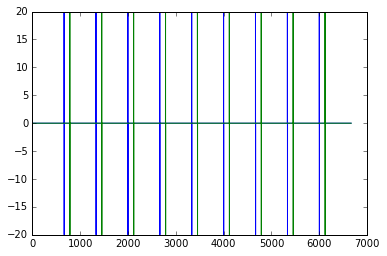

In [2]:
s1 = e2cm.Psycho2Pulsetrain(freq=20, dur=0.5, pulse_dur=.075/1000.,
                            interphase_dur=.075/1000., delay=0.,
                            tsample=.075/1000., current_amplitude=20,
                            pulsetype='cathodicfirst')

s2 = e2cm.Psycho2Pulsetrain(freq=20, dur=0.5, pulse_dur=.075/1000.,
                            interphase_dur=.075/1000., delay=9/1000,
                            tsample=.075/1000., current_amplitude=20,
                            pulsetype='cathodicfirst')


plt.plot(s1.data)
plt.plot(s2.data)

In [20]:
ea1 = e2cm.ElectrodeArray([250], [0], [0])
ea2 = e2cm.ElectrodeArray([100, 100], [-200, 200], [200, -200])

x = 2000
y = 1500
r = e2cm.Retina(axon_map='../retina2000by1500lambda2.npz', xlo=-x, xhi=x, ylo=-y, yhi=y)
#ecm = r.ecm(ea2, [s1, s2])

In [17]:
ecs, cs = r.electrode_ecs(ea2)

/Users/arokem/anaconda/lib/python3.5/site-packages/numpy-1.11.0b2-py3.5-macosx-10.5-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will return a copy of the mask. In the future, it will try to return both as views.
  FutureWarning


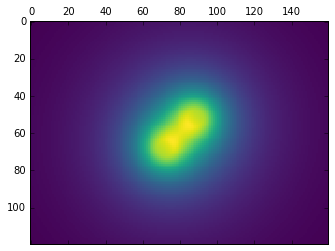

In [26]:
plt.matshow(np.sum(cs, -1), cmap='viridis')

/Users/arokem/anaconda/lib/python3.5/site-packages/numpy-1.11.0b2-py3.5-macosx-10.5-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will return a copy of the mask. In the future, it will try to return both as views.
  FutureWarning


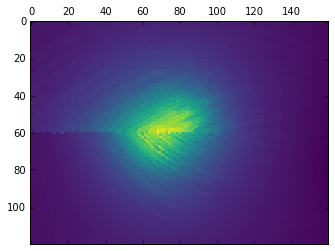

In [25]:
plt.matshow(np.sum(ecs, -1), cmap='viridis')

In [13]:
tm1 = ec2b.TemporalModel()

In [14]:
fps = 30 
rs = int(1 / (fps * s1.tsample) )

In [29]:
sr = ec2b.pulse2percept(tm1, ecs, r, [s1, s2], rs)

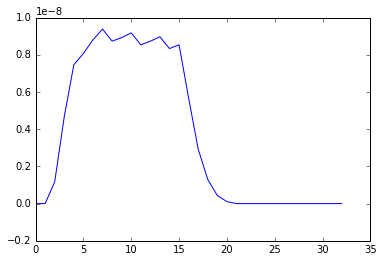

In [30]:
plt.plot(sr.data[40,40])